<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/HW/HW_neralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 



In [357]:
"""
input_num :インプット層のニューロン数
hidden_num ：隠れ層のニューロン数
output_num ：出力層のニューロン数
"""
N = 4#データ数(ミニバッチ)
input_num = 2 
hidden_num = 12
output_num = 1

In [358]:
"""
重み、バイアス、初期設定
W1：隠れ層の重み
B1:隠れ層のバイアス
W2:出力層の重み
B2:隠れ層のバイアス
"""


W1 = np.random.rand(input_num,hidden_num)
B1 = np.random.rand(hidden_num)
W2 = np.random.rand(hidden_num,output_num)
B2 = np.random.rand(output_num)

In [359]:
i = 0


epoch = 0
epoch_num= 200
loss = np.zeros(epoch_num)
W2_1 = np.zeros(epoch_num)
W1_1_1 =np.zeros(epoch_num)
N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
beta1 = 0.9
beta2 = 0.999
epsiron = 0.00000001
alpha = 0.0001
mX = np.zeros((hidden_num,1))
vX = np.zeros((hidden_num,1))
hid_delta_accum = np.zeros((hidden_num,1))
m = 0
v = 0

In [360]:
#シグモイド関数（出力層）

def sigmoid(x):
  return 1/(1+np.exp(-x))
"""
def sigmoid(x):
  if x < -5:
    return 0

  if -5<=x<=5:
    return 1/10*x+0.5

  if 5 < x:
    return 1
""" 

#ReLU関数（隠れ層）
def relu(x):
  return np.maximum(0,x)
"""
ReLU関数
x:入力,
n:x切片,
a:傾き

def relu(x,n,a):
  
  if x<5:
    out = 5
  
  if 5<=x<=50:
    y = a*(x-n)
    out = np.maximum(y,0)

  if x>50:
    out = 50
  
  return out
"""
 

'\nReLU関数\nx:入力,\nn:x切片,\na:傾き\n\ndef relu(x,n,a):\n  \n  if x<5:\n    out = 5\n  \n  if 5<=x<=50:\n    y = a*(x-n)\n    out = np.maximum(y,0)\n\n  if x>50:\n    out = 50\n  \n  return out\n'

In [361]:
#交差エントロピー誤差

def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0]#yの行数
  return np.sum(-t*np.log(y)-(1-t)*np.log(1-y))/batch_size


  
  

In [362]:
#活性化関数の微分(relu)u:隠れ層の活性

def relu_diff(u):
  d = np.zeros_like(u) #xと同じ形状の配列を作成
  for i in range(len(u)):
    for j in range(len(u[0])):
      if u[i][j]>0:
        d[i][j] = 1
      else: 
        d[i][j] = 0

  return d


In [363]:
#隠れ層の誤差
"""
delta:一個前の誤差（出力層の誤差）
w:一個前の重み（出力層の重み）
activ:活性化関数の微分
"""
def hidden_delta(delta,w,activ):
  d = np.zeros((N,hidden_num)) #データ数×隠れ層のニューロン数の配列を作成
  for i in range(len(delta)):
    #print("i = ", i)
    for j in range(hidden_num):
      #print("j =", j)
      d[i][j] = delta[i]*w[j]*activ[i][j]
      #if i == 0 and j == 1:
        #print(d[i][j])
        #print(delta[i])
        #print(w[i])
        #print(activ[i][j])

  return np.array(d)
  


In [364]:


for i in range(epoch_num):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  #print(Z1)
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  loss[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  


  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  Z1_t = np.transpose(Z1)
  deltaX_accum = np.dot(Z1_t,delta)
  #print(Z1_t)
  beta1coef = (1-beta1)/N
  beta2coef = (1-beta2)/N/N
 

  delta_accum = np.sum(delta) 
  learning_ratecoef = learning_rate/N
 
  """
  W2 = (1-alpha*learning_rate)*W2-learning_ratecoef*deltaX_accum
  """
  W2 = W2-learning_ratecoef*deltaX_accum
  #print("a")
  W2_1[i]= W2[1]

  B2 = B2 -learning_ratecoef*delta_accum

  

  #print(W2)
  ###隠れ層の逆伝搬
  
  differential_y = relu_diff(Z1)#活性化関数の微分
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  hid_delta_accum =np.transpose(np.sum(hid_delta,axis=0))
  #print(hid_delta_accum)
 
  #print(W1)
  #print(delta)
  #print(W2)
  #print(differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  hid_deltaX_accum = np.dot(x_t,hid_delta)
 
  #print(B2)
  for i in range(hidden_num):
    for j in range(input_num):
      #W1[j][i] = (1-alpha*learning_rate)*W1[j][i]-learning_ratecoef*hid_deltaX_accum[j][i]
      W1[j][i] = W1[j][i]-learning_ratecoef*hid_deltaX_accum[j][i]
      W1_1_1[i] = W1[1][1]

    B1[i] = B1[i] -learning_ratecoef*hid_delta_accum[i]
  
  epoch = epoch +1

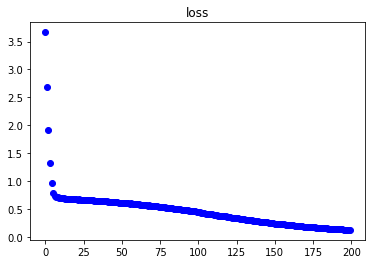

In [365]:
#グラフ表示
p = np.arange(epoch_num)
plt.scatter(p, loss, c='b', label='loss_data')
plt.title('loss')
plt.show()

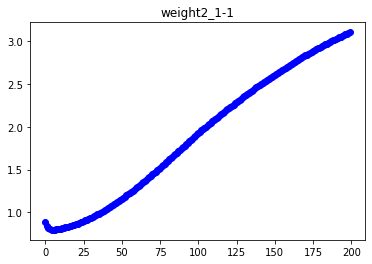

In [366]:
#重みの変化
p = np.arange(epoch_num)
plt.scatter(p, W2_1, c='b', label='weight2_1-1')
plt.title('weight2_1-1')
plt.show()

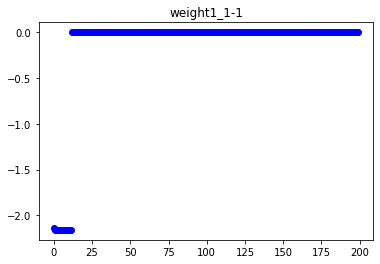

In [367]:
#重みの変化
p = np.arange(epoch_num)
plt.scatter(p, W1_1_1, c='b', label='weight1_1-1')
plt.title('weight1_1-1')
plt.show()

In [368]:
A1 = np.dot(x,W1) +B1
Z1 = relu(A1)#一層目活性化関数かける


A2 = np.dot(Z1,W2)+B2
Z22 = sigmoid(A2)

delta = Z2 - target#誤差
print(Z22)
print(W1)
print(W2)
loss[99]

[[0.15486611]
 [0.86120235]
 [0.91763133]
 [0.09615062]]
[[-0.99048296  2.1538622   0.59011375  0.87317929  0.3681854  -0.17009514
   0.46858987 -0.30311264  0.74282681  1.30957108  0.82385163  0.82161532]
 [ 1.00758298 -2.15891494  0.15326177 -0.28409772  0.91206485  1.03644101
   0.42345957  0.15397451  0.29071897 -0.35751273  0.19168302  0.25822303]]
[[ 1.59009184]
 [ 3.10209847]
 [ 0.12248547]
 [-0.8897009 ]
 [ 0.69399012]
 [ 0.62916635]
 [ 0.00533461]
 [ 0.44060268]
 [ 0.07065316]
 [-1.0976421 ]
 [-0.18038822]
 [-0.32909349]]


0.4476563607568283